In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_dict = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=0)
df_dict = df_dict.iloc[:,2:4]
df_dict

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Numero Uno - FinPro - DS29/Source Code/Dataset/E Commerce Dataset.csv', sep=';')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3098,53099,0,26.0,Mobile Phone,1,11.0,Debit Card,Female,2.0,4,Grocery,2,Divorced,4,0,14.0,NaN,2.0,5.0,291
2308,52309,0,11.0,Mobile Phone,3,8.0,Debit Card,Female,2.0,3,Laptop & Accessory,5,Married,4,0,15.0,0.0,1.0,7.0,169
2325,52326,1,0.0,Computer,3,8.0,Debit Card,Female,NaN,4,Mobile,1,Single,8,0,14.0,0.0,1.0,0.0,128
3740,53741,0,16.0,Computer,1,16.0,Credit Card,Female,4.0,4,Mobile Phone,1,Single,3,0,14.0,5.0,6.0,9.0,162
4023,54024,1,10.0,Mobile Phone,3,17.0,Debit Card,Female,4.0,4,Fashion,4,Married,7,0,22.0,1.0,2.0,8.0,198


In [ ]:
print('Number of Rows:', df.shape[0])
print('Number of Features:', df.shape[1])

Number of Rows: 5630
Number of Features: 20


# **Stage 1 - EDA**

## **1. Statistical Descriptive**

In [ ]:
df.info()

NameError: ignored

In [ ]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus','Complain']
nums = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
df[cats].describe()

In [ ]:
df[nums].describe()

NameError: ignored

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
Kolom yang perlu diubah tipe datanya menjadi object:
   - CustomerID
   - Churn
   - CityTier
   - Complain
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
Terdapat beberapa kolom yang memiliki null value seperti: 
   - Tenure
   - WarehouseToHome
   - HourSpendOnApp
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
   - CashbackAmount
3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
  Terdapat beberapa kolom yang memiliki data yang agak aneh seperti:
   - WarehouseToHome, nilai mean (15.6) berbeda jauh dengan max (127)
   - NumberOfAddress, nilai mean (4.2) berbeda jauh dengan max (22)
   
  Terdapat beberapa kolom yang memiliki value yang mirip seperti:
   - PreferredPaymentMode, memiliki value yang mirip (COD dan Cash on Delivery) dan (CC dan Credit Card)
   - PreferedOrderCat, memiliki value yang mirip Phone dan Mobile Phone

## **2. Univariate Analysis**

In [ ]:
cats = ['CustomerID', 'Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','Complain',  'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

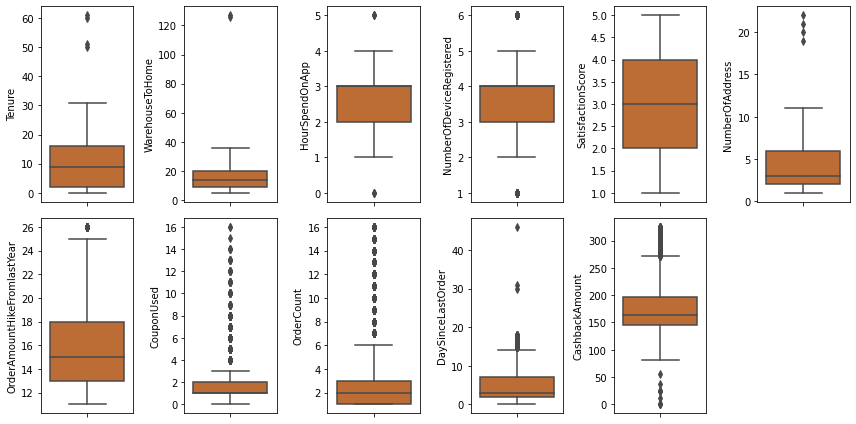

In [ ]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()

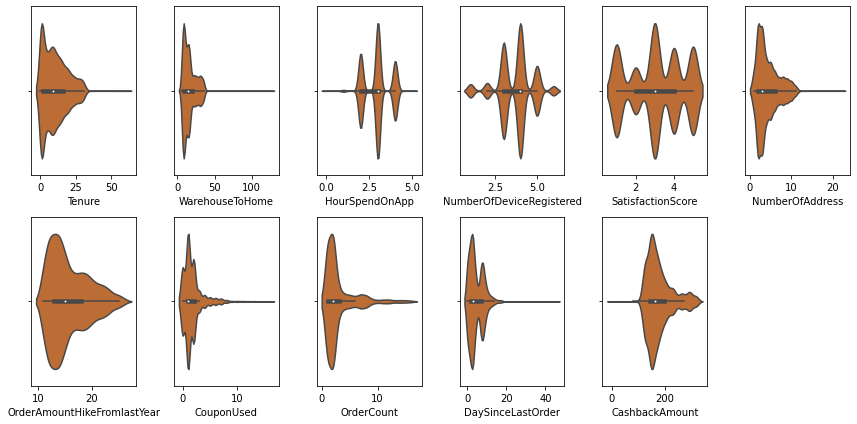

In [ ]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(2, 6, i+1)
    sns.violinplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()

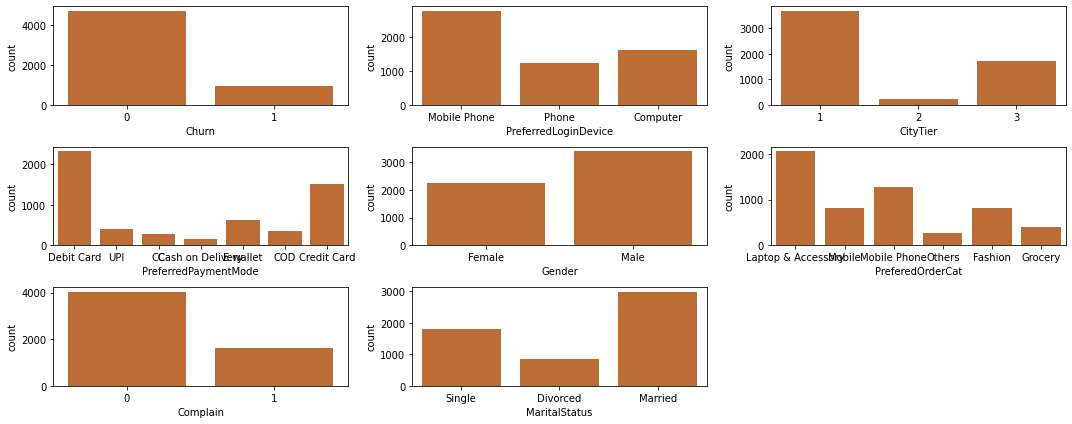

In [ ]:
plt.figure(figsize=(15,6))
for i in range(0, len(cats[1:])):
    plt.subplot(3, 3, i+1)
    sns.countplot(df[cats[1:][i]], color='chocolate')
    plt.tight_layout()

1. Skewness, beberapa kolom yang memiliki right skew antara lain:
    - Tenure
    - WarehouseToHome
    - NumberOfAddress
    - OrderAmountHikeFromlastYear
    - CouponUsed
    - OrderCount
    - DaySinceLastOrder
2. Outliers, hampir seluruh kolom memiliki outliers kecuali kolom SatisfactionScore
3. Bimodal, beberapa kolom memiliki bimodal seperti:
    - HourSpendOnApp
    - NumberOfDeviceRegistered
    - SatisfactionScore


## **3. Multivariate Analysis**

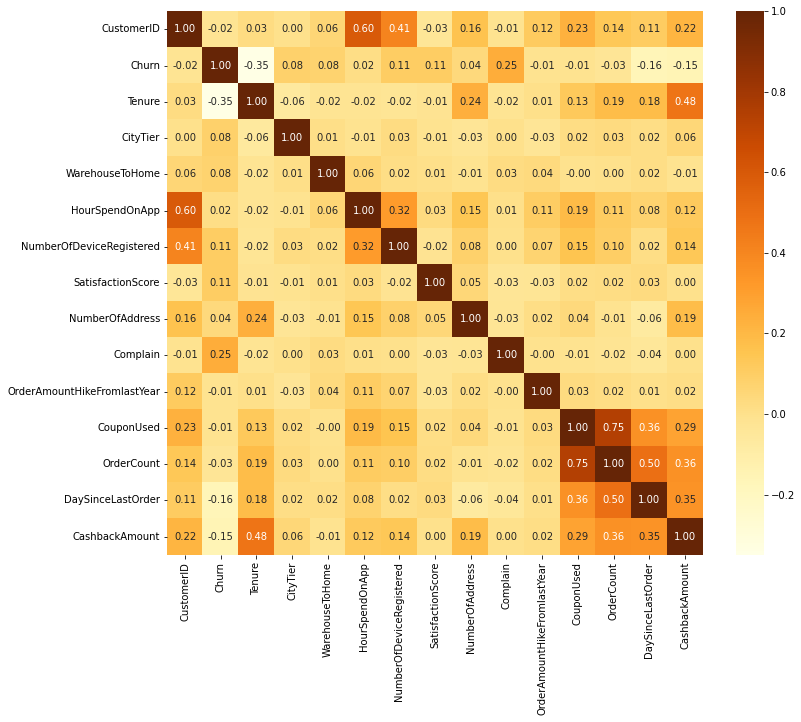

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')

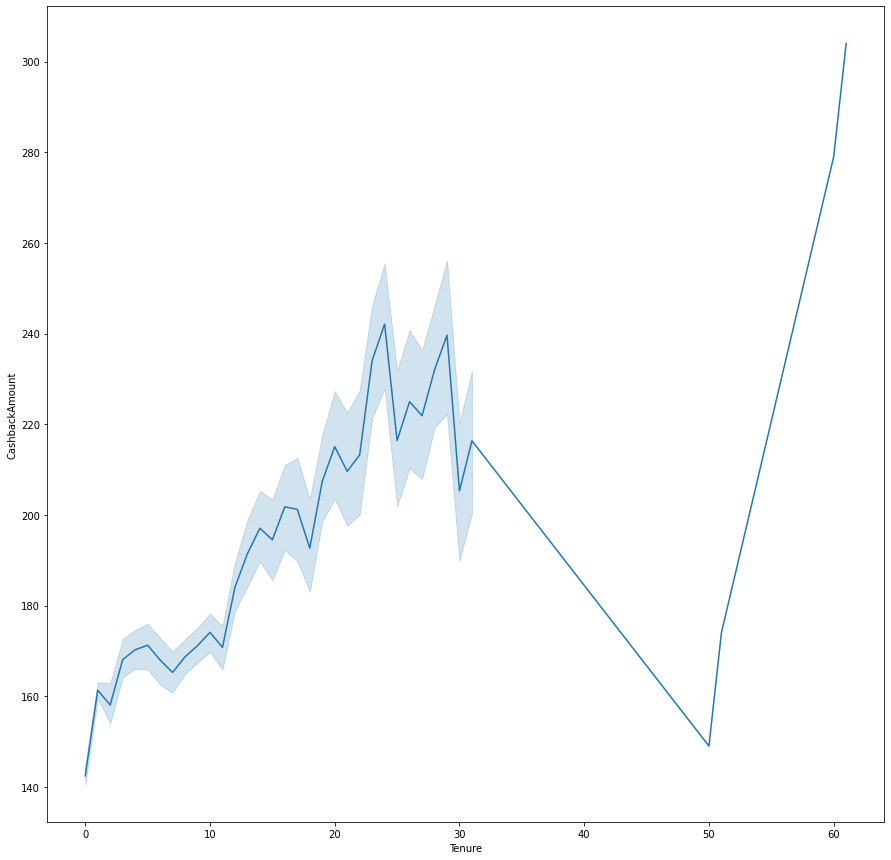

In [ ]:
# plt.figure(figsize=(15,15))
# sns.lineplot(x=df['Tenure'], y=df['CashbackAmount'])

<Figure size 1080x1080 with 0 Axes>

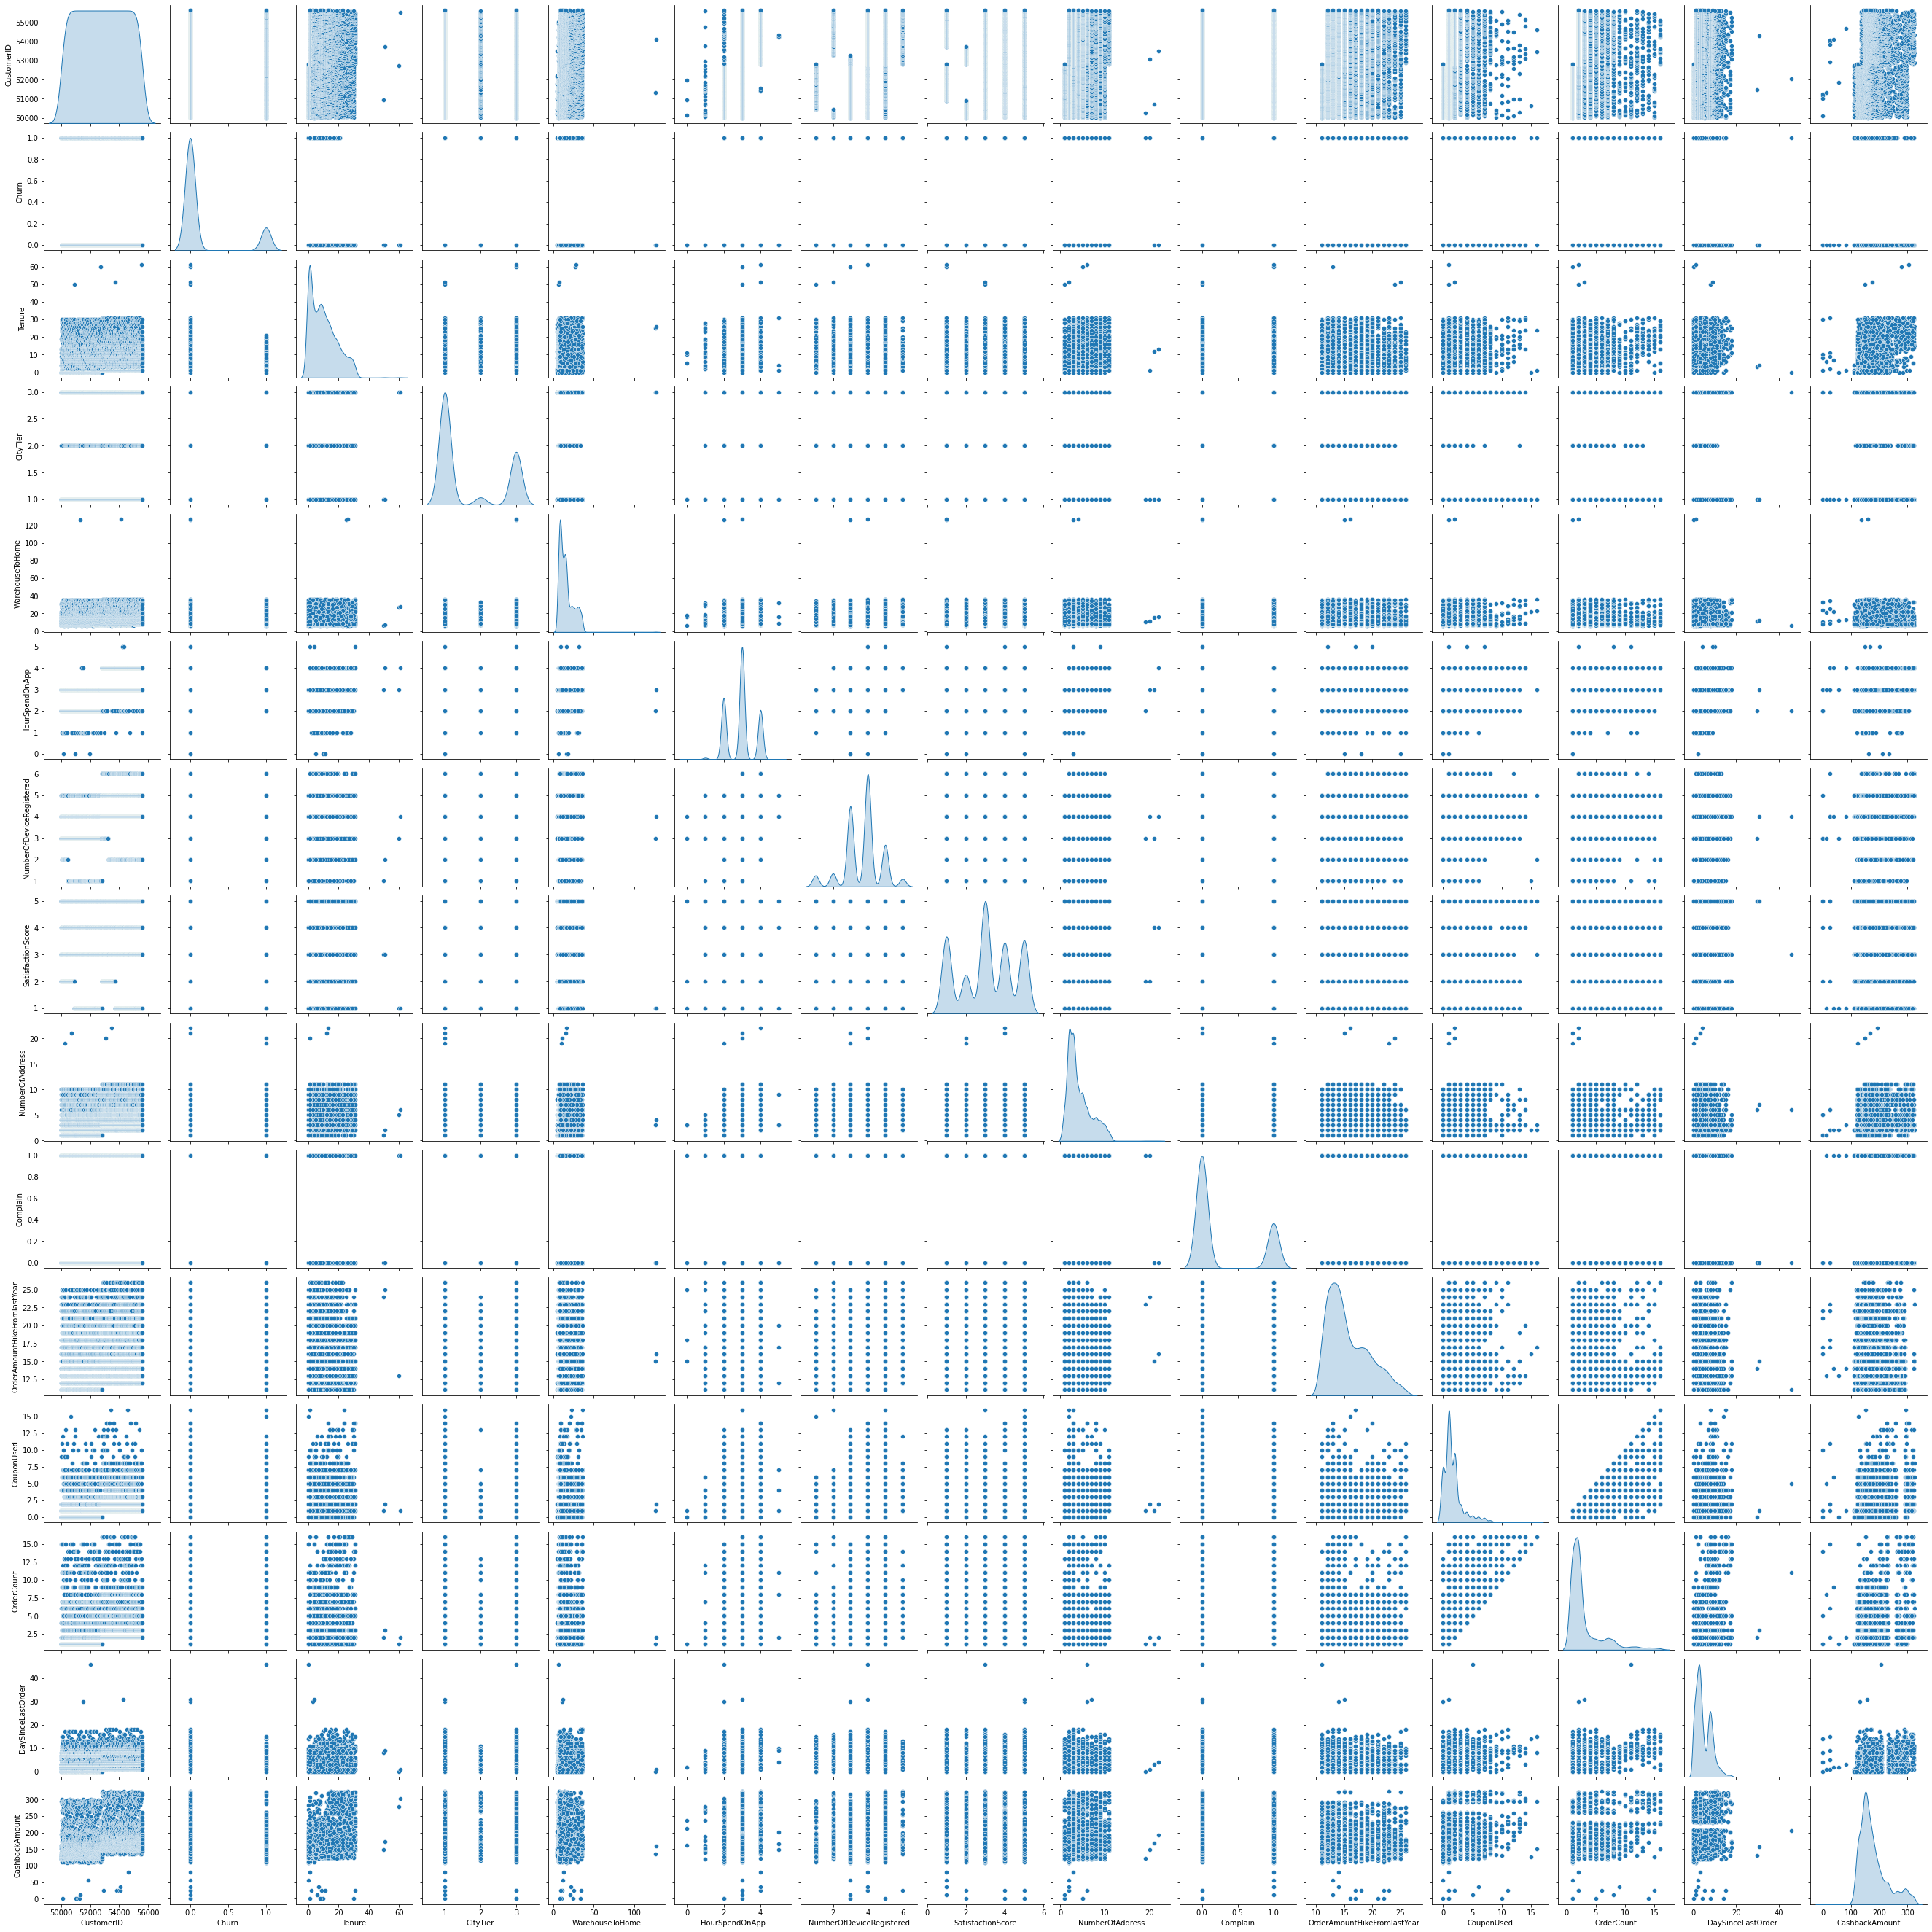

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

Churn
PreferredLoginDevice
CityTier
PreferredPaymentMode
Gender
PreferedOrderCat
Complain
MaritalStatus


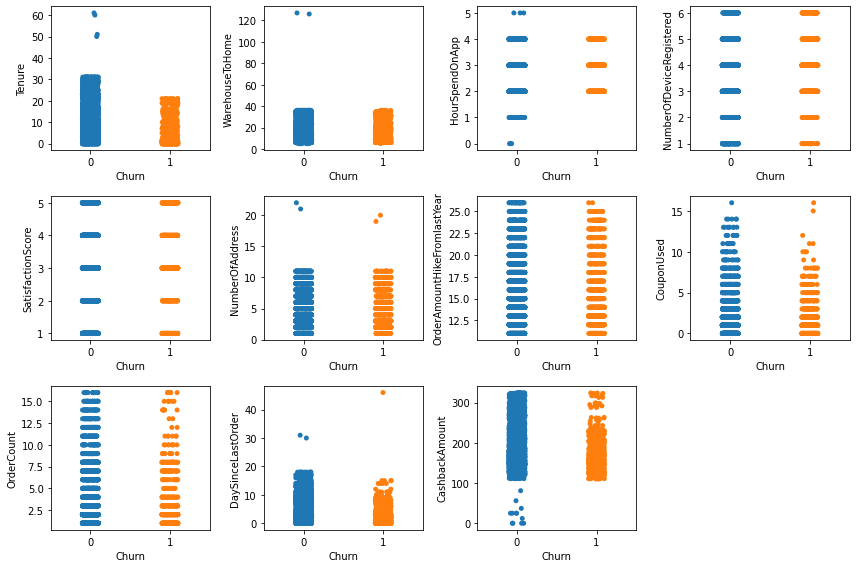

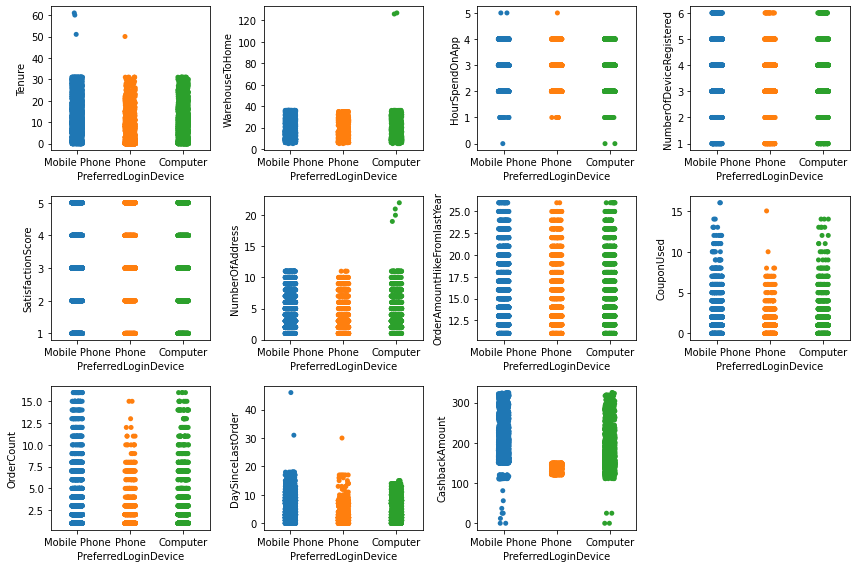

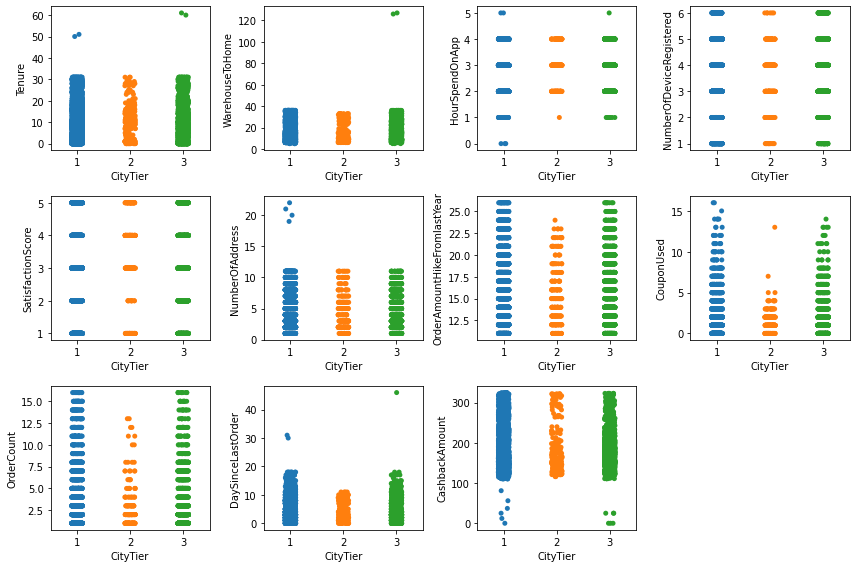

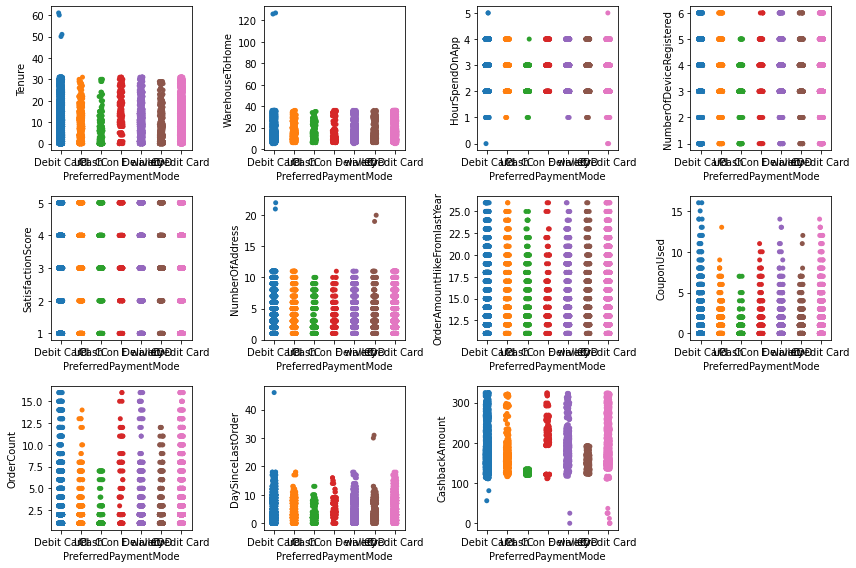

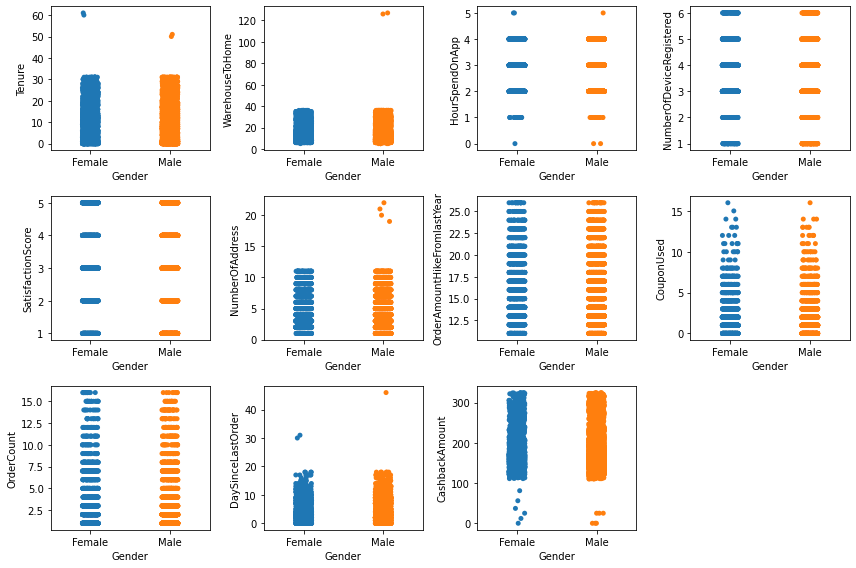

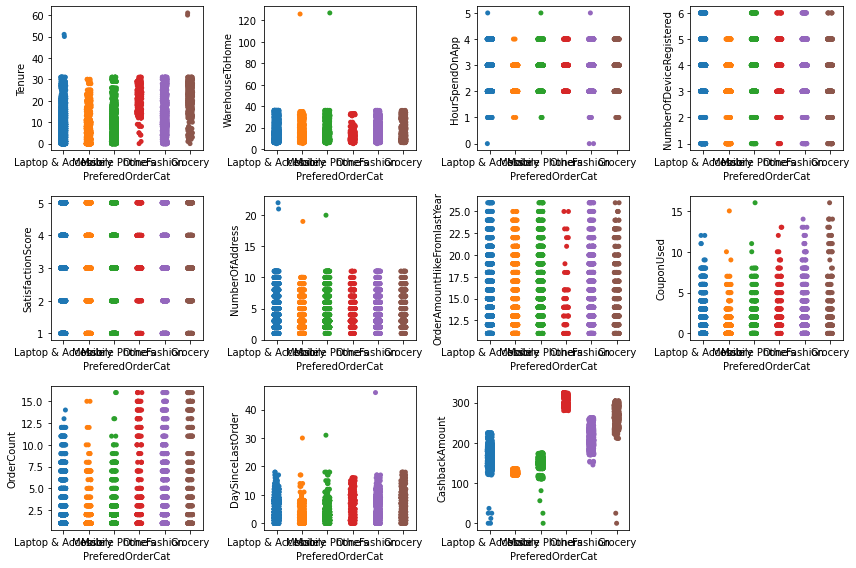

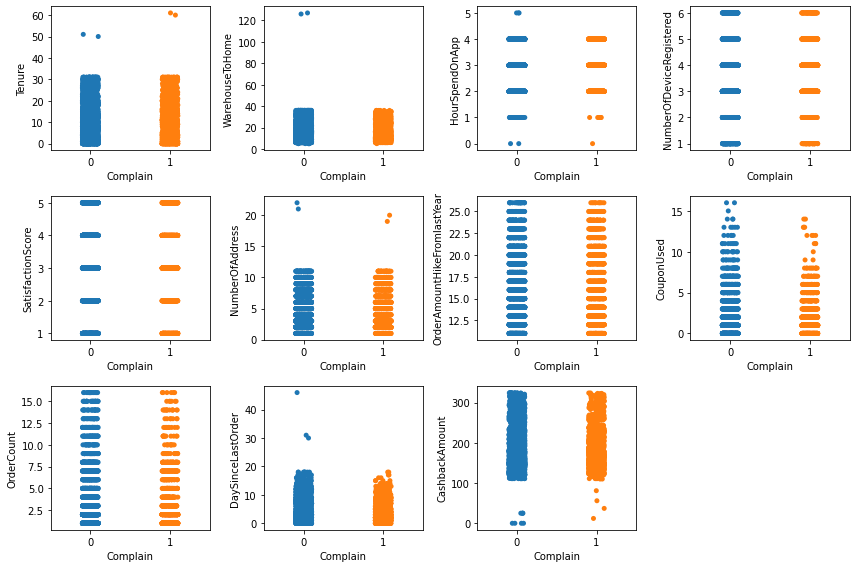

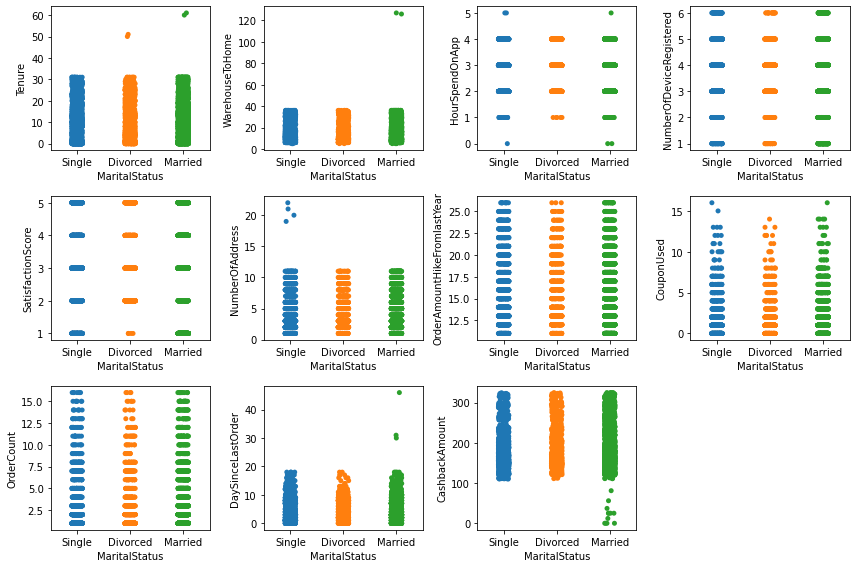

In [ ]:
for plot in range(1, len(cats)):
  print(cats[plot])
  fig = plt.figure(figsize=(12, 8))
  for i in range(0, len(nums)):
      ax = fig.add_subplot(3, 4, i+1)
      sns.stripplot(ax=ax, data=df, x=cats[plot], y=nums[i]) 
      plt.tight_layout()

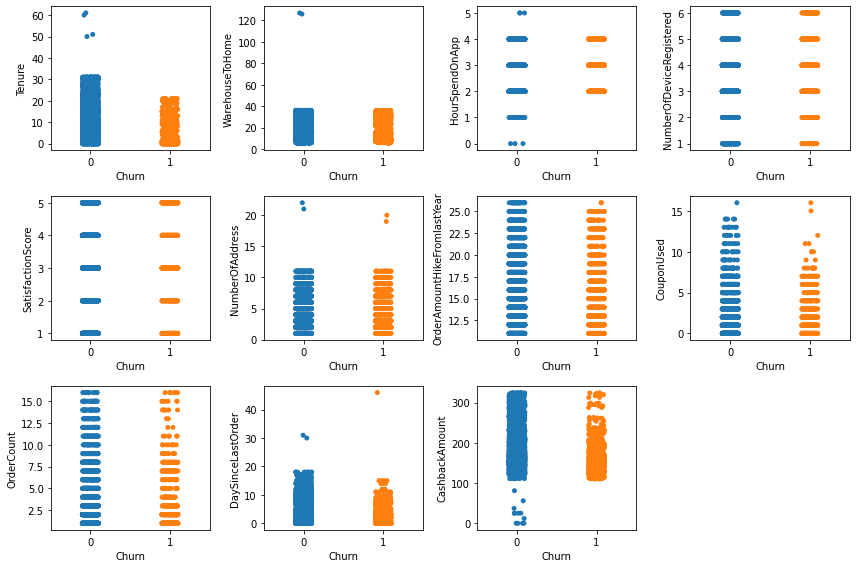

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='Churn', y=nums[i]) 
    plt.tight_layout()

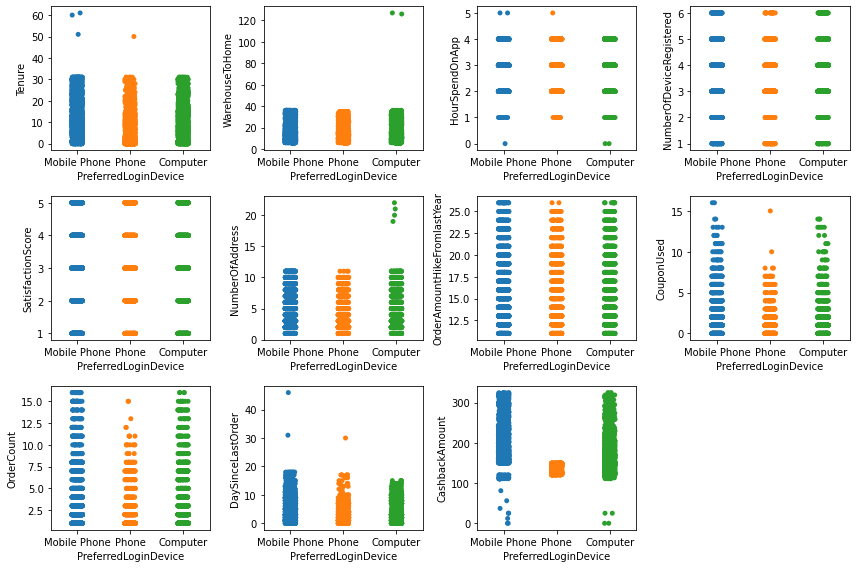

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='PreferredLoginDevice', y=nums[i])
    plt.tight_layout()

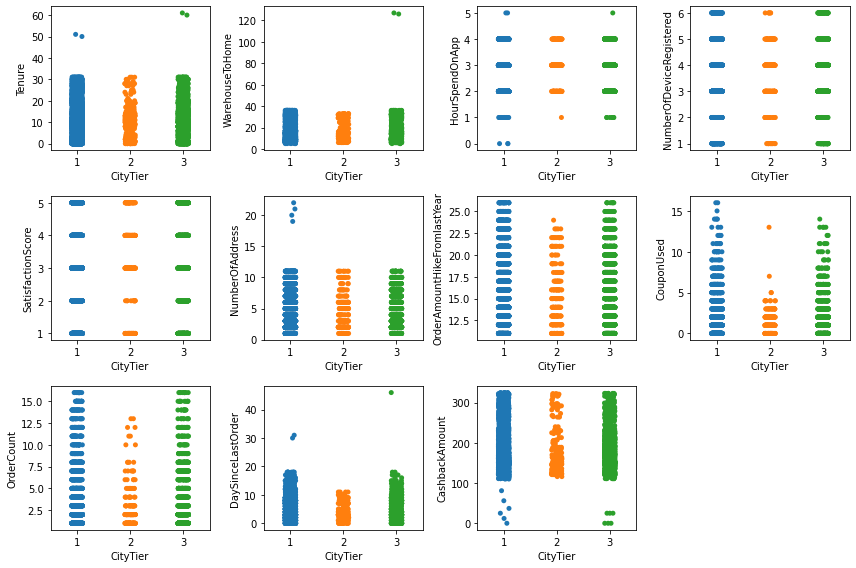

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='CityTier', y=nums[i])
    plt.tight_layout()

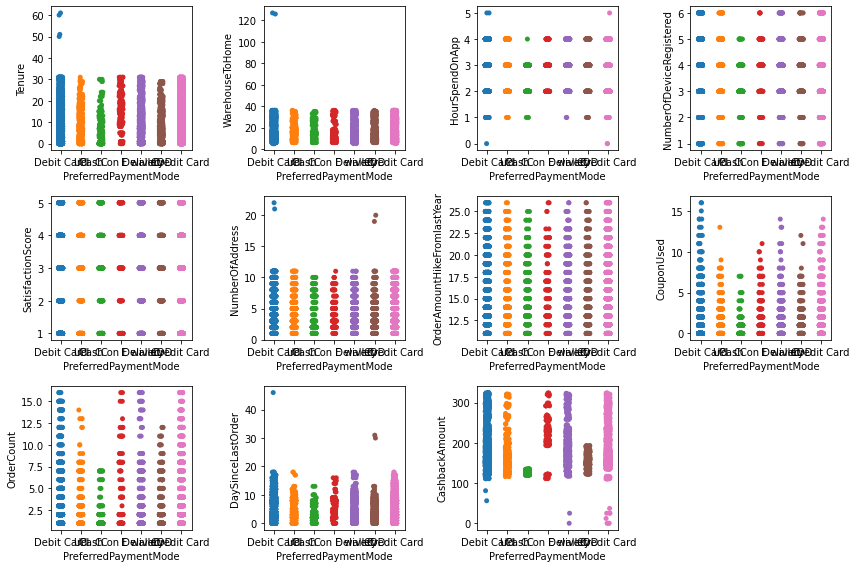

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='PreferredPaymentMode', y=nums[i])
    plt.tight_layout()

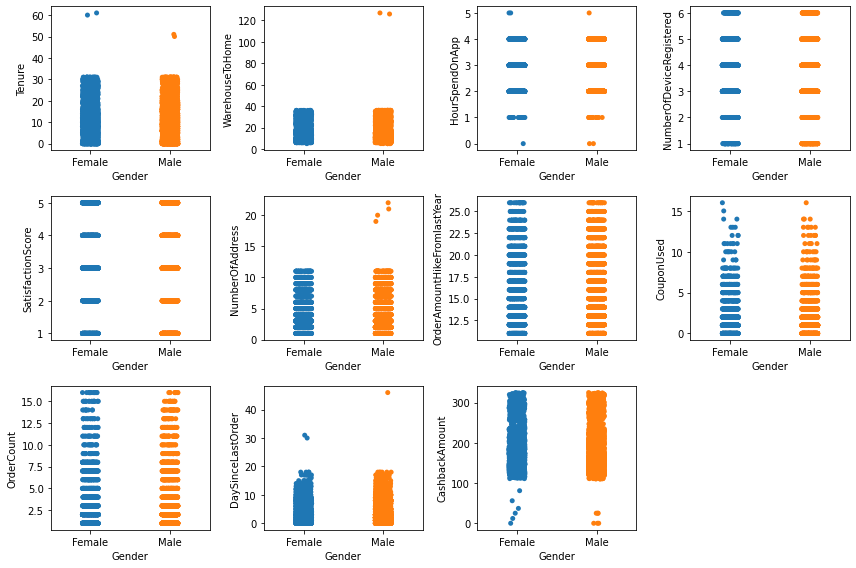

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i])
    plt.tight_layout()

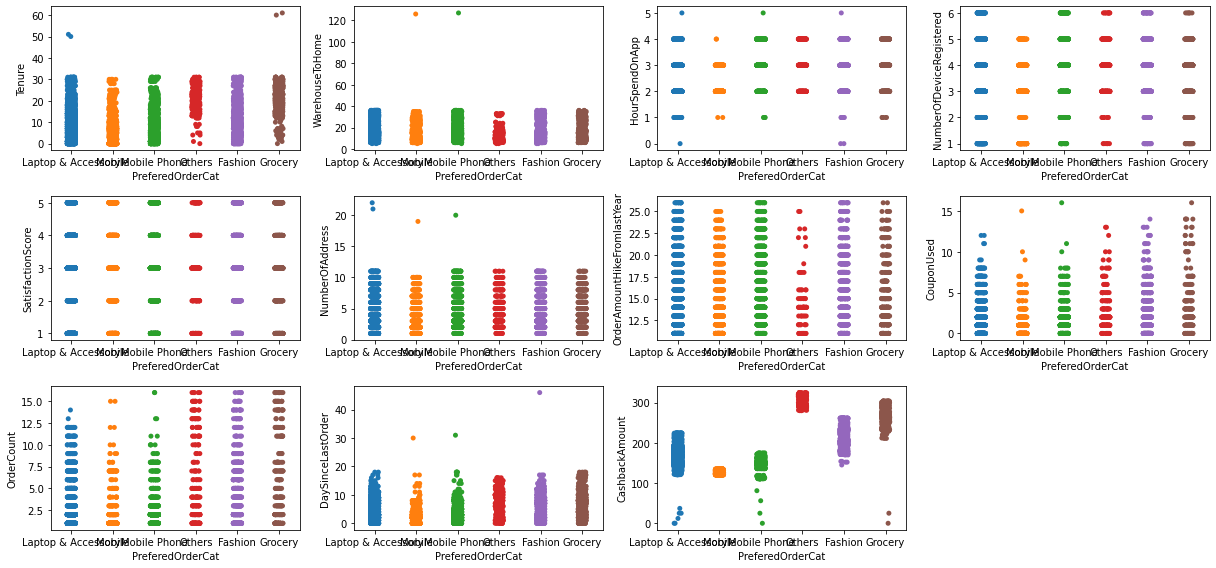

In [ ]:
fig = plt.figure(figsize=(17, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='PreferedOrderCat', y=nums[i])
    plt.tight_layout()

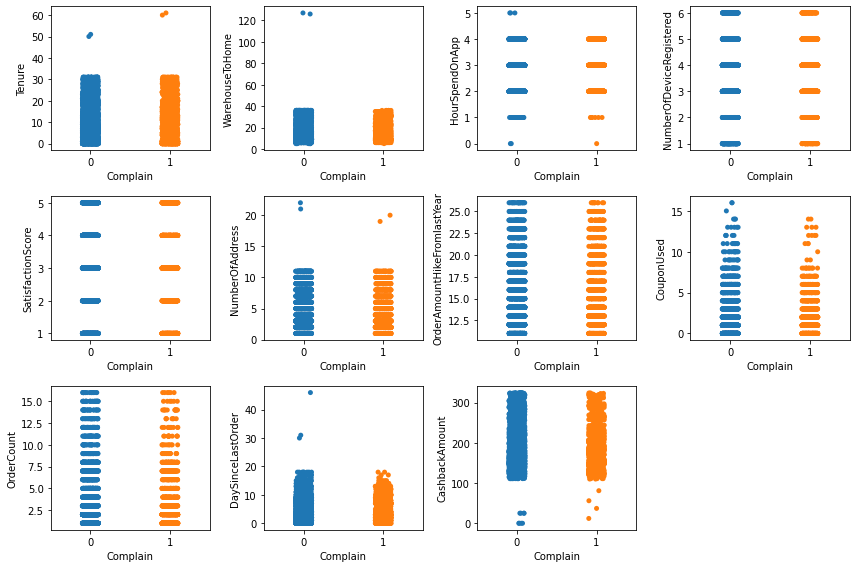

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='Complain', y=nums[i])
    plt.tight_layout()

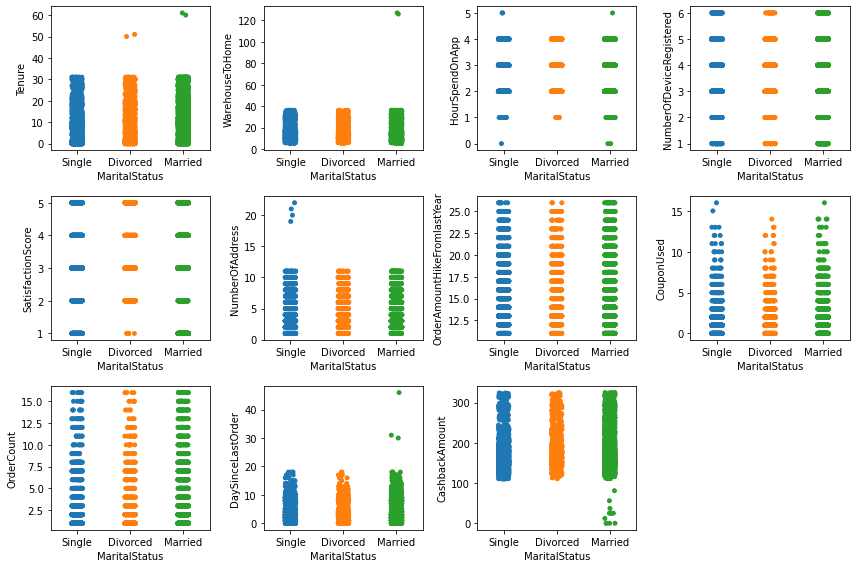

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1) 
    sns.stripplot(ax=ax, data=df, x='MaritalStatus', y=nums[i])
    plt.tight_layout()